# COVID-19 and Urban Air Pollution

New York Univeristy CS-GY 6513 Spring 2020 Final Project

Tianrun Wang (tw969), Raymond Dee (rmd377), Jonathan Pun (jp5474)

## Abstract

The public health crisis caused by the Novel Coronavirus (COVID-19) prompted governments worldwide to restrict human movement in a bid to limit the spread of the respiratory disease. Since the outbreak in March 2020 in the United States, many states and municipalities have issued stay-at-home orders, and economic activity has been largely reduced to essential services only. The unprecedented restriction on economic activity has led to a significant drop in traffic volume, factory production, and other sources widely attributted to urban air pollution, leading to a substantial improvement in air quality in major U.S. cities.

In this project, we analyze the relationship between the severity of COVID-19 outbreak in a city and the improvement of air quality. We will primarily focus our analysis on the experience of New York City, due to the quality and availability of its high-frequency data on ground traffic, air pollution and COVID-19 case count.

## Notebook Setup

In [86]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling and Overview

### 1. EPA Air Quality Data

In [87]:
# EPA daily air quality data in 2019 and 2020
aqi19 = pd.read_csv('data/aqidaily2019.csv')
aqi20 = pd.read_csv('data/aqidaily2020.csv')

# concat rows
aqi = pd.concat([aqi19, aqi20], axis=0)

# parse Date column to datetime and set as index, sort ascending
aqi['Date'] = pd.to_datetime(aqi['Date'], format='%m/%d/%Y')
aqi.set_index('Date', inplace=True)
aqi.sort_index(inplace=True)

In [88]:
aqi.head()

,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
Date,,,,,,,,,,,
2019-01-01,45,PM2.5,MASPETH LIBRARY,36-081-0120,AQS,6,30,0,.,45,38
2019-01-02,64,PM2.5,PS 19,36-061-0128,AQS,7,29,6,.,64,32
2019-01-03,54,PM2.5,PS 19,36-061-0128,AQS,6,26,3,11,54,37
2019-01-04,60,PM2.5,Elizabeth Lab,34-039-0004,AQS,9,20,6,.,60,34
2019-01-05,50,PM2.5,DIVISION STREET,36-061-0134,AQS,9,26,33,.,50,31


In [89]:
len(aqi)

480

The dataframe consists of daily observations of air quality index and 6 pollutants in the metropolitan New York area ranging from 2019-01-01 to 2020-04-24. We will use Overall AQI Value as the primary gauge of air quality, quoting EPA, "AQI is a measure that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality".

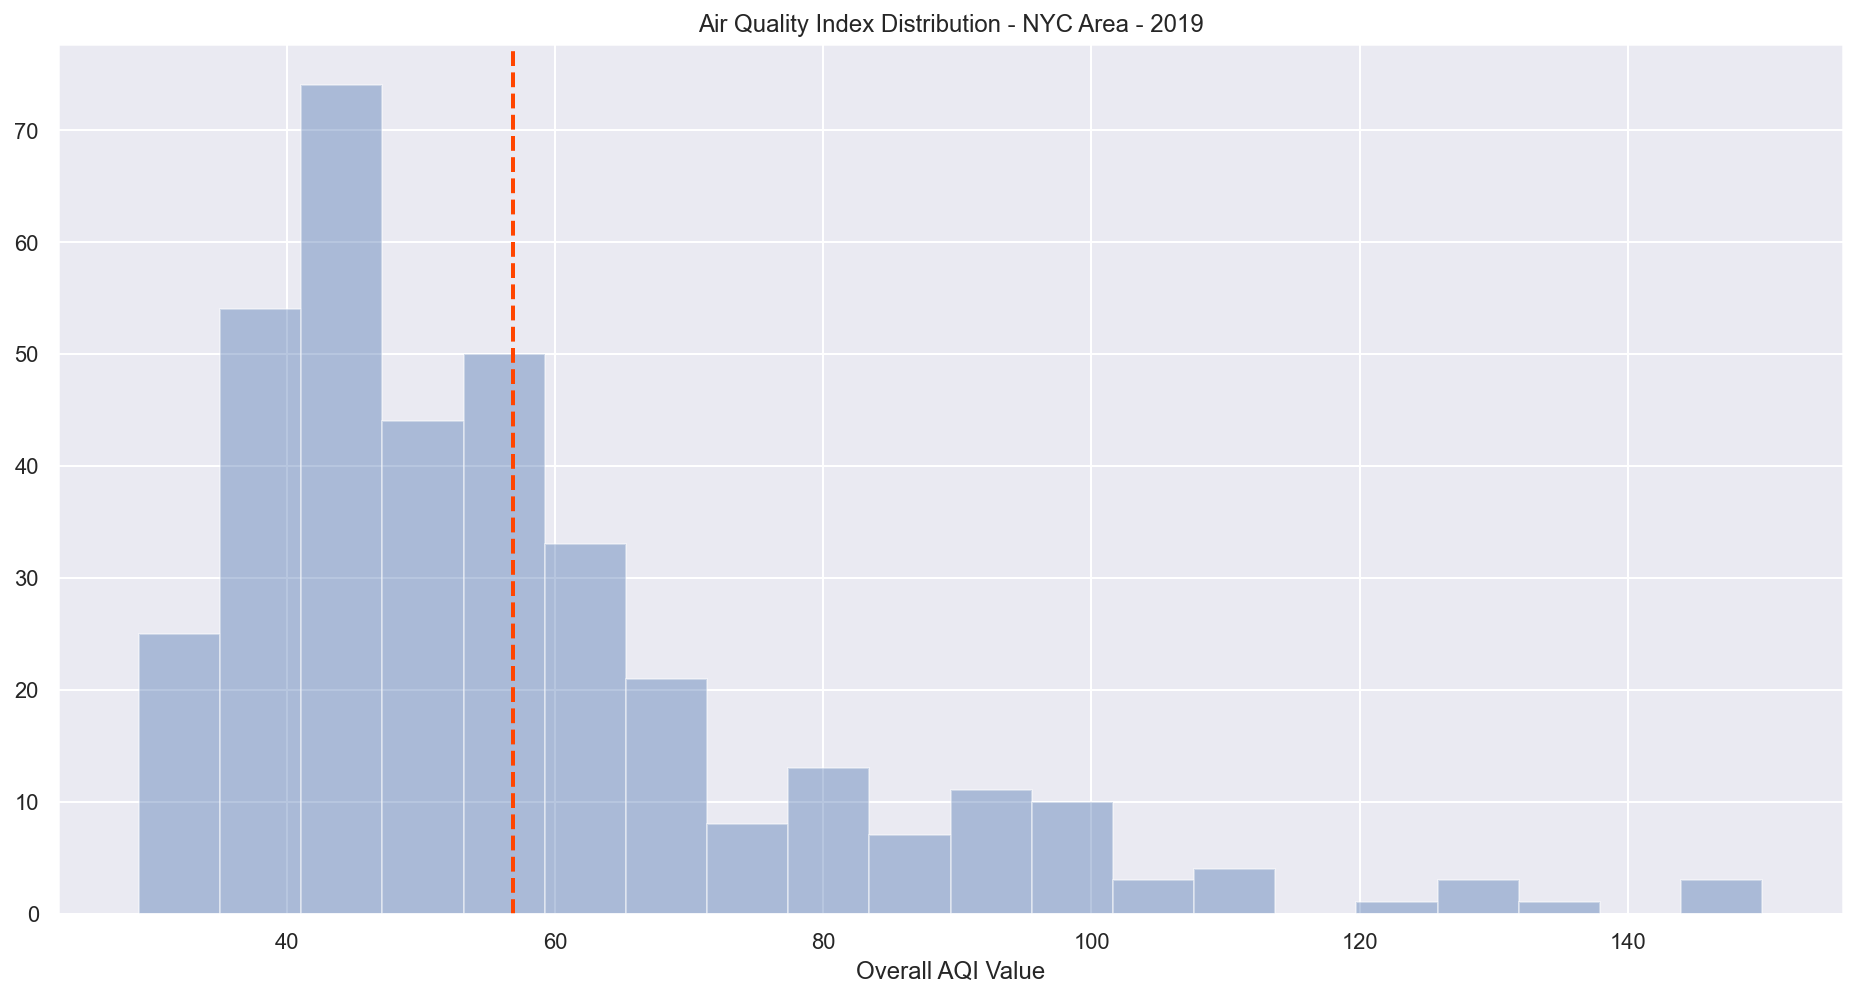

In [155]:
# AQI distribution plot (2019)
sns.set(color_codes=True)
plt.figure(figsize=(16,8))
ax = sns.distplot(aqi19['Overall AQI Value'], kde=False)
_ = ax.axvline(aqi19['Overall AQI Value'].mean(), color='orangered', linestyle='--', lw=2, alpha=1.0)
_ = ax.set_title('Air Quality Index Distribution - NYC Area - 2019')

An interesting observation just by looking at the top 5 rows of `aqi` is that PM2.5 seems to be the main pollutant in New York City, let's examine the dataframe more closely.

In [90]:
# group by Main Pollutant and count
aqi.groupby(['Main Pollutant']).count()

,Overall AQI Value,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,SO2,PM10,PM25,NO2
Main Pollutant,,,,,,,,,,
NO2,61,61,61,61,61,61,61,61,61,61
Ozone,190,190,190,190,190,190,190,190,190,190
PM2.5,229,229,229,229,229,229,229,229,229,229


We see that PM2.5 and Ozone (O3) are the major pollutants in NYC area with Nitrogen Dioxide (NO2) a distant third. PM2.5 is defined as fine particles with a diameter of 2.5 μm or less, and is often emitted by automobile engines and industrial fuel consumption, according to [Wikipedia](https://en.wikipedia.org/wiki/Particulates#Sources_of_atmospheric_particulate_matter). This is consistent with our hypothesis that the improvement in air quality is due to the reduction of ground traffic caused by COVID-19 shutdowns.

A noteworthy point is that although Ozone does the remarkable job of absorbing ultraviolet radiation at high altitudes in the atmosphere, it is harmful to breathe and causes serious health problems, and is often created by burning fossil fuel at ground level, hence reported by EPA as a pollutant.

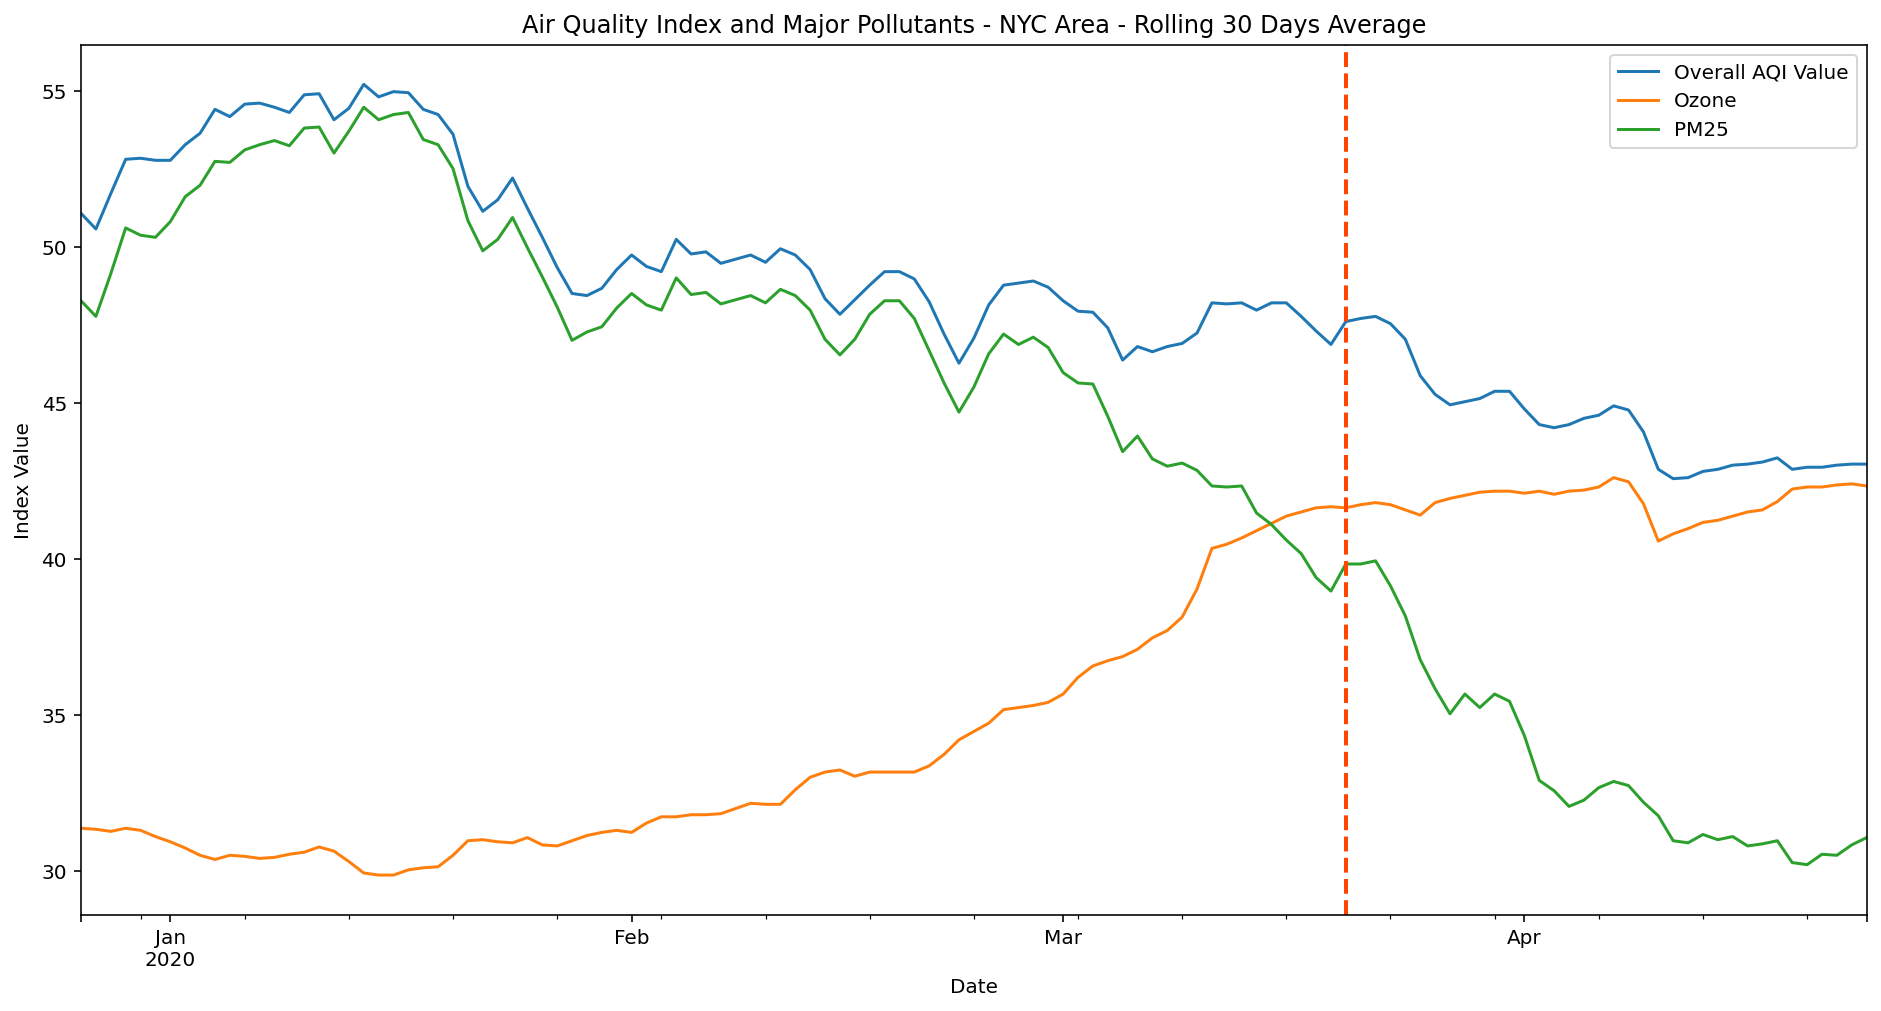

In [136]:
# major pollutants trend from January to April 2020, 30-day average
pollutants = ['Overall AQI Value', 'Ozone', 'PM25']
ax = aqi[pollutants].tail(150).rolling(30).mean().dropna().plot(figsize=(16, 8))
_ = ax.axvline('2020-03-20', color='orangered', linestyle='--', lw=2, alpha=1.0)
_ = ax.set_ylabel('Index Value')
_ = ax.set_title('Air Quality Index and Major Pollutants - NYC Area - Rolling 30 Days Average')

We see a significant drop in Air Quality Index (better air quality) and PM2.5 levels since New York State issued the stay-at-home order on March 20 (red line), which directed all non-essential workers to work from home. Notice that we did not include Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Sulfur Dioxide (SO2), or PM10 as those are published with a lag and as of this writing they are not yet available.

A very interesting observation is that Ozone has risen as other pollutants receded. This is likely due to the so-called "weekend effect" first identified in California metropolitan areas where Ozone concentration increases during weekends despite lower diesel traffic. This counter-intuitive phenomenon is due to a temporary change of ratios of various pollutants in the atmosphere having a stimulative effect in Ozone formation over weekends when there is a brief reduction in ground traffic. Interested readers should refer to [this article](https://engineering.berkeley.edu/news/2009/03/the-ozone-weekend-effect/) published by UC Berkeley where the weekend effect was first studied.

### 2. MTA Daily Traffic Data

We derived the daily traffic volume data from the Hourly Traffic on Metropolitan Transportation Authority (MTA) Bridges and Tunnels dataset found on [Open NY](https://data.ny.gov/Transportation/Hourly-Traffic-on-Metropolitan-Transportation-Auth/qzve-kjga). As the original dataset features 1.59 million rows, we chose to only include the 2019 and 2020 data in our repo, which has about 191,000 rows, and it looks like this

In [92]:
mta_hourly = pd.read_csv('data/mta_hourly_traffic.csv', nrows=5)
mta_hourly.head()

,Plaza_ID,Date,Hour,Direction,Vehicles_ETC,Vehicles_cash
0,21,04/18/2020,0,I,517,130
1,21,04/18/2020,1,I,305,92
2,21,04/18/2020,2,I,219,76
3,21,04/18/2020,3,I,229,65
4,21,04/18/2020,4,I,368,56


Where Plaza ID identifies the toll plaza of a bridge or tunnel, Hour identifies the hour of the Date, Direction is a binary indicator that is either inbound (I) or outbound (O), Vehicles_ETC is the number of vehicles that pass through a toll station using E-ZPass each hour, and Vehicles_cash is that of the vehicles using cash.

To be consistent with other datasets we are using, we choose to aggregate hourly traffic volume into daily volume. As the orignal file is rather large, we did this part of the data wrangling on NYU's dumbo system using Spark SQL. The SQL statement we used to generate `mta_daily_traffic.csv` is as follows

```sql
SELECT `Date`, sum(Vehicles_ETC) AS Vehicles_ETC, sum(Vehicles_cash) AS Vehicles_cash FROM mta_hourly 
WHERE Date LIKE '%/2019' OR `Date` LIKE '%/2020' GROUP BY `Date`;
```

In [93]:
# MTA daily traffic through bridges and tunnels
mta_daily = pd.read_csv('data/mta_daily_traffic.csv')

# parse Date column to datetime and set as index, sort ascending
mta_daily['Date'] = pd.to_datetime(mta_daily['Date'], format='%m/%d/%y')
mta_daily.set_index('Date', inplace=True)
mta_daily.sort_index(inplace=True)

# we are interested in the total throughput
mta_daily['TotalVehicles'] = mta_daily.sum(axis=1)

In [94]:
mta_daily.head()

,Vehicles_ETC,Vehicles_cash,TotalVehicles
Date,,,
2019-01-01,507979,87764,595743
2019-01-02,633083,84992,718075
2019-01-03,658237,84787,743024
2019-01-04,668302,90224,758526
2019-01-05,543013,85487,628500


In [95]:
len(mta_daily)

470

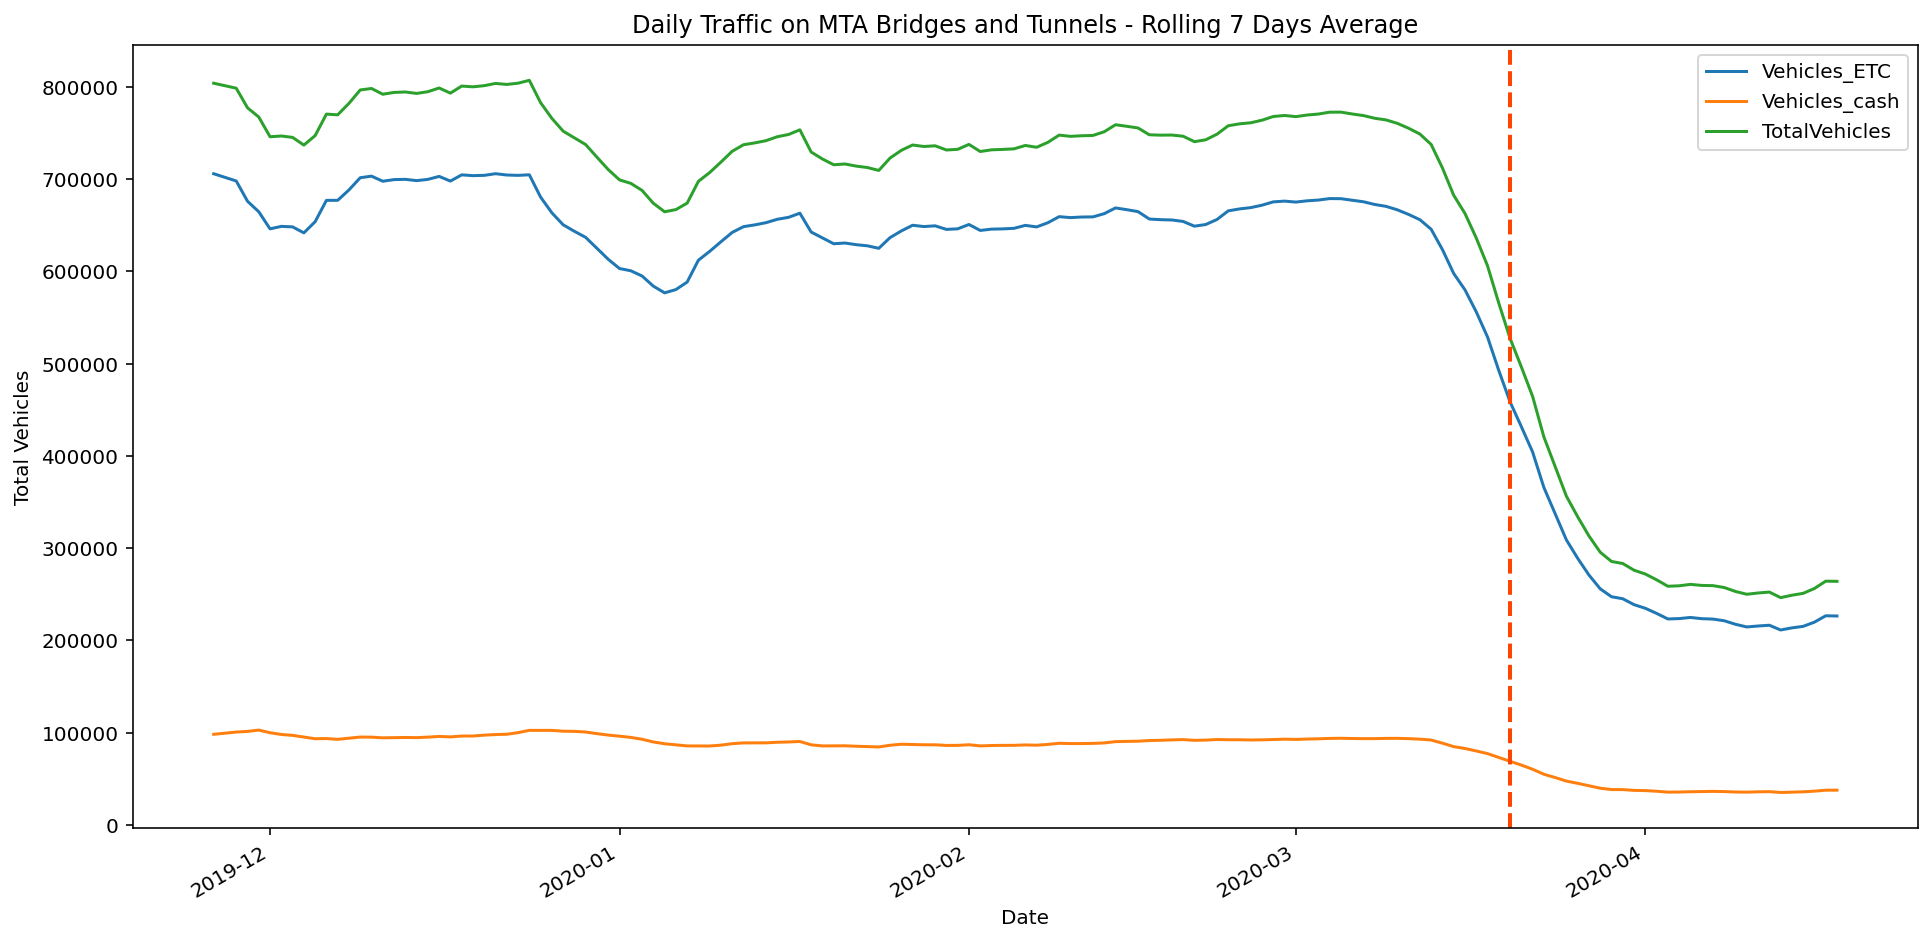

In [137]:
# trend of total vehicles passing thru bridges and tunnels
ax = mta_daily.tail(150).rolling(7).mean().dropna().plot(figsize=(16, 8))
_ = ax.axvline('2020-03-20', color='orangered', linestyle='--', lw=2, alpha=1.0)
_ = ax.set_ylabel('Total Vehicles')
_ = ax.set_title('Daily Traffic on MTA Bridges and Tunnels - Rolling 7 Days Average')

We see a significant drop in total vehicles on MTA bridges and tunnels since New York State issued the stay-at-home order on March 20 (red line), which directed all non-essential workers to work from home.

### 3. Johns Hopkins COVID-19 Data (New York State)

We derived the New York State daily confirmed cases time series from the original US data, please see `project/data/README.md` for detailed source description.

In [97]:
# confirmed cases in NY, we use locality column and date columns only
covid = pd.read_csv('data/covid19_confirmed_NY.csv', usecols=lambda x: '/20' in x or x=='Admin2')

In [98]:
covid.head()

,Admin2,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,Albany,0,0,0,0,0,0,0,0,0,...,548,581,619,648,682,687,704,737,758,805
1,Allegany,0,0,0,0,0,0,0,0,0,...,28,28,29,30,30,30,30,30,30,31
2,Bronx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Broome,0,0,0,0,0,0,0,0,0,...,153,167,178,186,192,199,205,219,224,232
4,Cattaraugus,0,0,0,0,0,0,0,0,0,...,32,32,34,34,34,34,35,37,37,39


We want to use date as row index instead of column names, so we need to transpose the dataframe.

In [99]:
# transpose the dataframe and set index to be Date
covid = covid.transpose()
covid.columns = covid.iloc[0, ]
covid = covid.drop(['Admin2'])
covid.columns.name = None
covid.index.name = 'Date'

# parse Date to datetime
covid.index = pd.to_datetime(covid.index, format='%m/%d/%y')

In [100]:
covid.tail()

,Albany,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,...,Tompkins,Ulster,Warren,Washington,Wayne,Westchester,Wyoming,Yates,Out of NY,Unassigned
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-20,687,30,0,199,34,36,25,73,78,51,...,119,997,101,65,50,24306,44,10,0,0
2020-04-21,704,30,0,205,35,36,25,75,79,56,...,123,1018,102,68,51,24656,44,10,0,0
2020-04-22,737,30,0,219,37,36,36,75,79,56,...,123,1018,108,73,52,25276,44,11,0,0
2020-04-23,758,30,0,224,37,37,26,76,82,52,...,119,942,119,80,53,25959,41,11,0,0
2020-04-24,805,31,0,232,39,39,27,79,84,53,...,121,976,122,83,53,26633,43,11,0,0


At this point, we have a covid dataframe where the columns are NY counties and the rows are daily confirmed cases. Apart from confirmed cases from each counties, we are also interested in the total NY State case count, and we will reflect this in the `total` column.

In [101]:
# add total case count for NY State
covid['TotalCases'] = covid.sum(axis=1)
covid['TotalCases'].tail()

Date
2020-04-20    248416.0
2020-04-21    253519.0
2020-04-22    258222.0
2020-04-23    263460.0
2020-04-24    271590.0
Name: TotalCases, dtype: float64

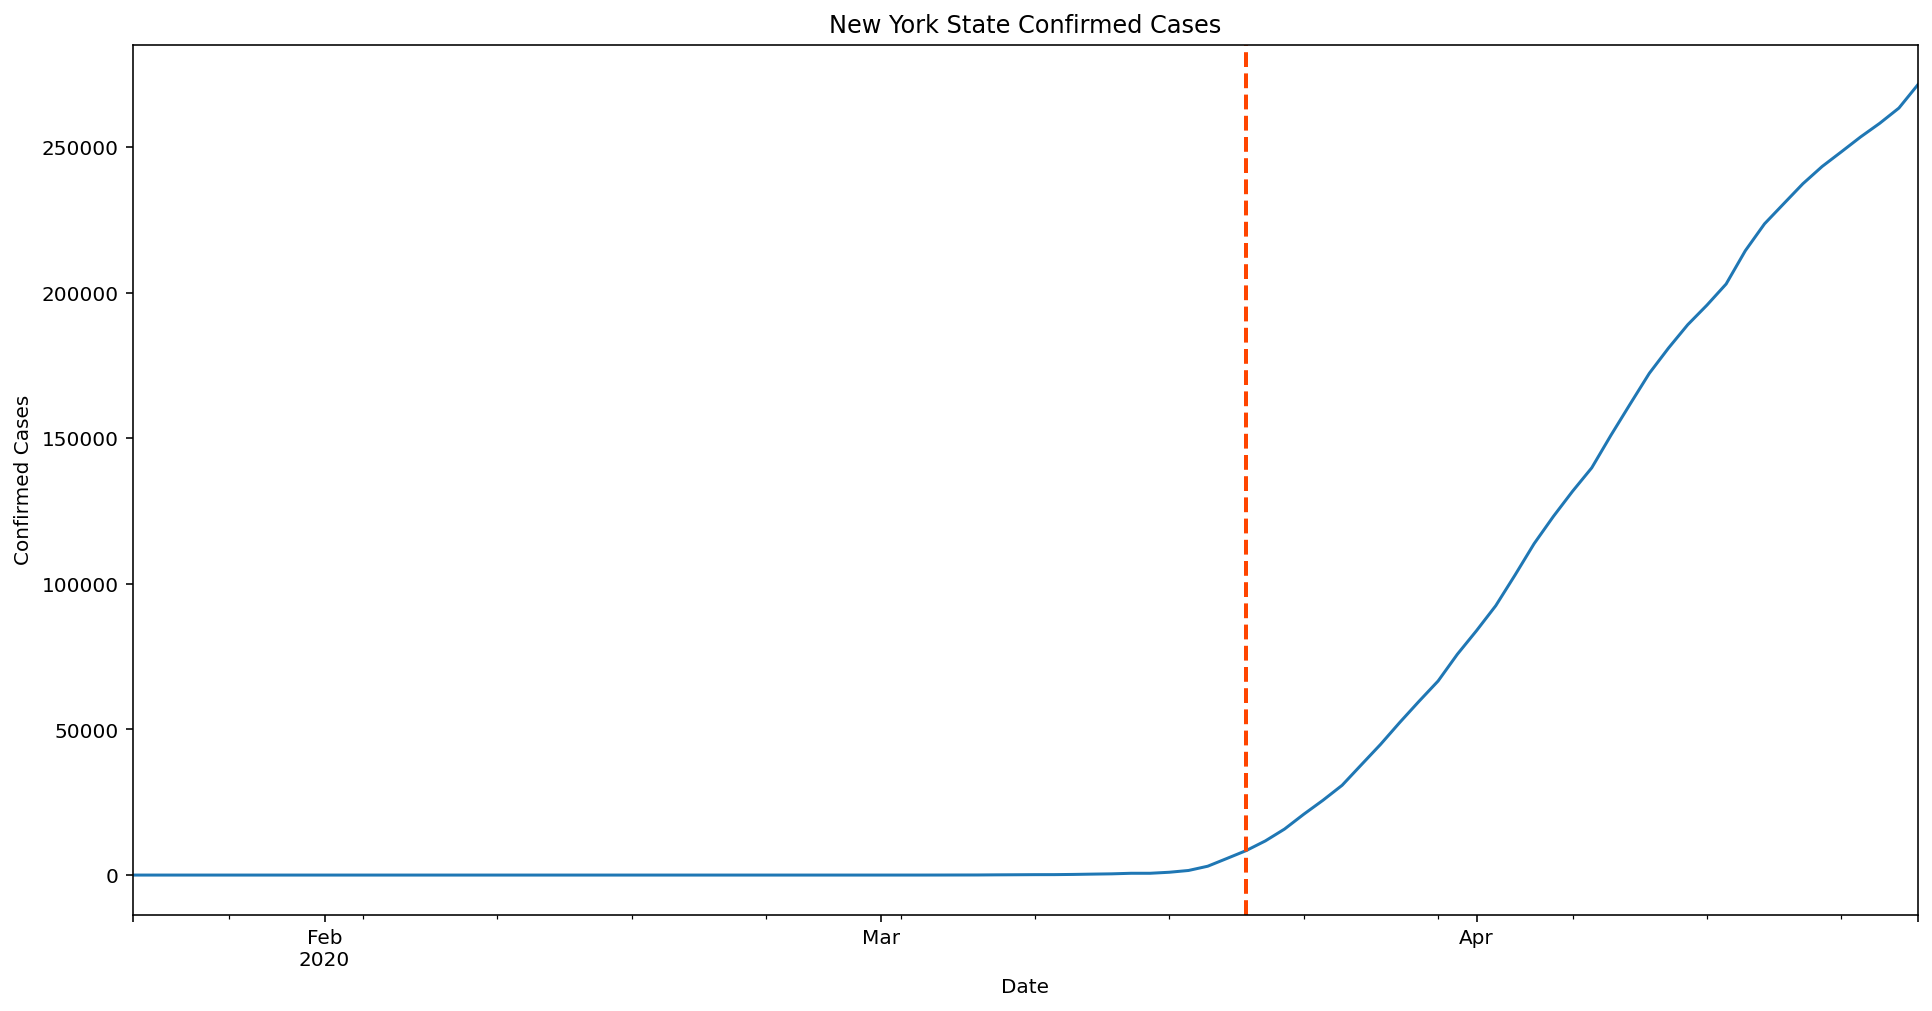

In [102]:
# NY confirmed cases time series plot
ax = covid['TotalCases'].plot(figsize=(16, 8))
_ = ax.axvline('2020-03-20', color='orangered', linestyle='--', lw=2, alpha=1.0)
_ = ax.set_ylabel('Confirmed Cases')
_ = ax.set_title('New York State Confirmed Cases')

As above, the red line denotes the stay-at-home order issued on March 20 by Governor Andrew Cuomo, on which day New York State reported 8403 total cases.

In [103]:
# New York State total cases on March 20
covid.loc['2020-03-20']

Albany           70
Allegany          2
Bronx             0
Broome            1
Cattaraugus       0
               ... 
Wyoming           2
Yates             0
Out of NY         0
Unassigned      449
TotalCases     8403
Name: 2020-03-20 00:00:00, Length: 65, dtype: object

### 4. WTI Crude Oil Futures Data - A Proxy of Industrial Activity

West Texas intermediate (WTI), also known as Texas light sweet, is a grade of crude oil used as a benchmark in oil pricing. The futures contracts tied to WTI are one of the world's most liquid and are [broadly recognized](https://www.cmegroup.com/trading/why-futures/welcome-to-nymex-wti-light-sweet-crude-oil-futures.html) as the proxy for international oil demand. We choose to use this dataset in our analysis as it covers another important source of air pollution - factory and industrial manufacturing.

Although direct measures of factory and industrial activity exist (see [St.Louis Fed](https://fred.stlouisfed.org/series/INDPRO) and [Institute for Supply Management](https://www.federalreserve.gov/releases/g17/current/default.htm)), they are usually monthly/quarterly readings and are published with a significant lag, therefore unsuitable for the analysis of a recent, ongoing event at this time. Whereas crude oil pricing data provide an accurate enough economic proxy for manufacturing activity (fuel and base material such as plastics) and they are generally high-quality and high-frequency.

The particular dataset we examine here is the daily settlement data for WTI futures for May 2020 delivery traded on Chicago Mercantile Exchange, with a unit of 1000 barrels/contract. We choose May because the termination of trading actually happens in the month prior to contract month (April), thus more economically sensitive to the COVID-19 crisis due to the delivery of actual crude oil. Our assumption is, holding supply constant, the higher the settlement price, the higher the demand, and therefore the higher the manufacturing activity, and vice versa. So we should expect to see a significant drop in contract price in the run-up to the COVID-19 disruptions.

In [104]:
# load data, parse datetime, set datekey as index
oil = pd.read_csv('data/clk2020.csv')
oil['datekey'] = pd.to_datetime(oil['datekey'], format='%Y-%m-%d')
oil.set_index('datekey', inplace=True)
oil.index.name = 'Date'
oil.tail()

,settle,volume,openinterest,ticker
Date,,,,
2020-04-15,19.87,529484.0,231678.0,CLK2020
2020-04-16,19.87,339086.0,203897.0,CLK2020
2020-04-17,18.27,233170.0,148838.0,CLK2020
2020-04-20,-37.63,231128.0,108593.0,CLK2020
2020-04-21,10.01,12250.0,13044.0,CLK2020


In [105]:
len(oil)

1363

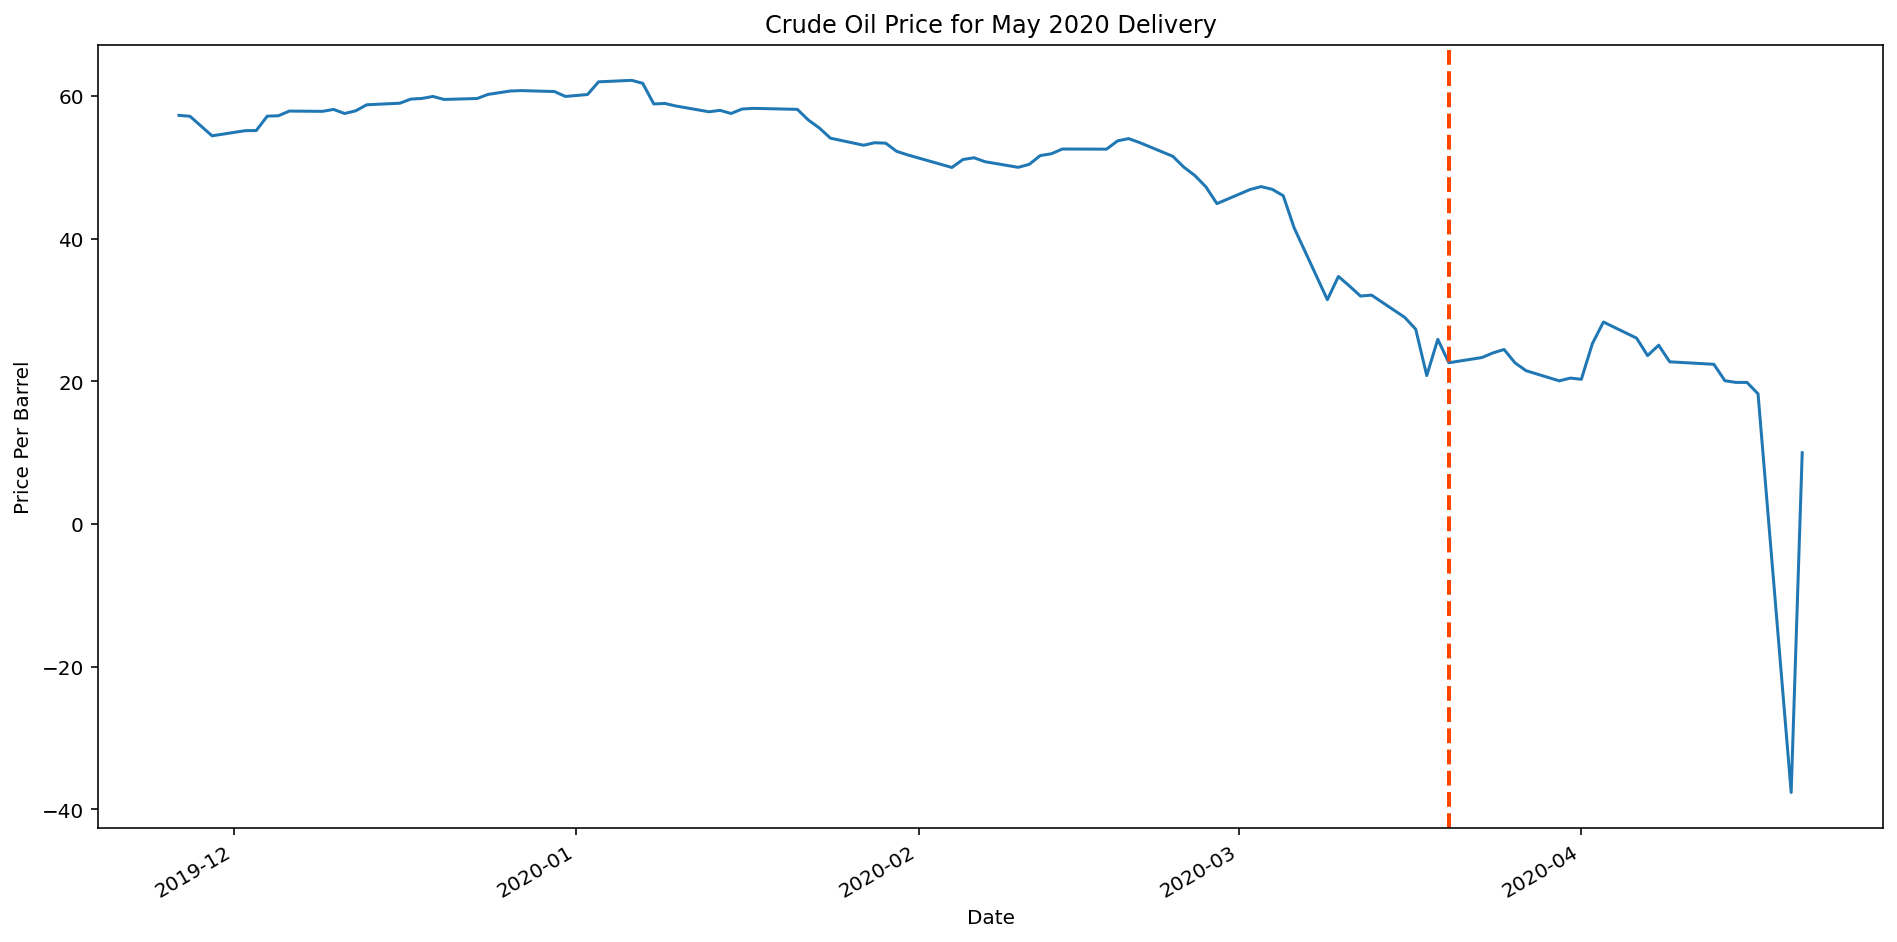

In [138]:
# WTI crude oil contracts time series plot
ax = oil['settle'].tail(100).plot(figsize=(16, 8))
_ = ax.axvline('2020-03-20', color='orangered', linestyle='--', lw=2, alpha=1.0)
_ = ax.set_ylabel('Price Per Barrel')
_ = ax.set_title('Crude Oil Price for May 2020 Delivery')

We see a huge demand-side shock to crude oil prices toward the end of April when the futures contract briefly fell below zero for the first time in US history. This is reportedly due to a massive reduction of demand and an overflow of inventory at storage sites.

### 5. Data Integration

In [141]:
# to facilitate data analysis, we join the four dataframes on the index (Date) into a master df
df = pd.concat([aqi[pollutants], covid['TotalCases'], mta_daily['TotalVehicles'], oil['settle']], axis=1)
df.rename(columns={'Overall AQI Value':'AQI', 'settle':'WTI'}, inplace=True)
df.dropna(inplace=True)

In [142]:
df

,AQI,Ozone,PM25,TotalCases,TotalVehicles,WTI
Date,,,,,,
2020-01-22,61.0,33.0,56.0,0.0,756915.0,56.66
2020-01-23,76.0,29.0,76.0,0.0,781551.0,55.54
2020-01-24,82.0,30.0,82.0,0.0,811503.0,54.12
2020-01-27,35.0,27.0,35.0,0.0,736525.0,53.13
2020-01-28,37.0,37.0,30.0,0.0,744840.0,53.48
...,...,...,...,...,...,...
2020-04-13,45.0,45.0,28.0,195749.0,241014.0,22.41
2020-04-14,43.0,43.0,18.0,203020.0,301494.0,20.11
2020-04-15,44.0,44.0,28.0,214454.0,289054.0,19.87


## Data Modeling and Analysis

In this section, we will begin with an exploratory analysis of the data we gathered with a focus on correlation among the time series, we will discuss environmental and economic explanations for the results, then proceed to model the data with linear regressions and predictive analysis.

### 1. Exploratory Analysis - Correlation of Variables

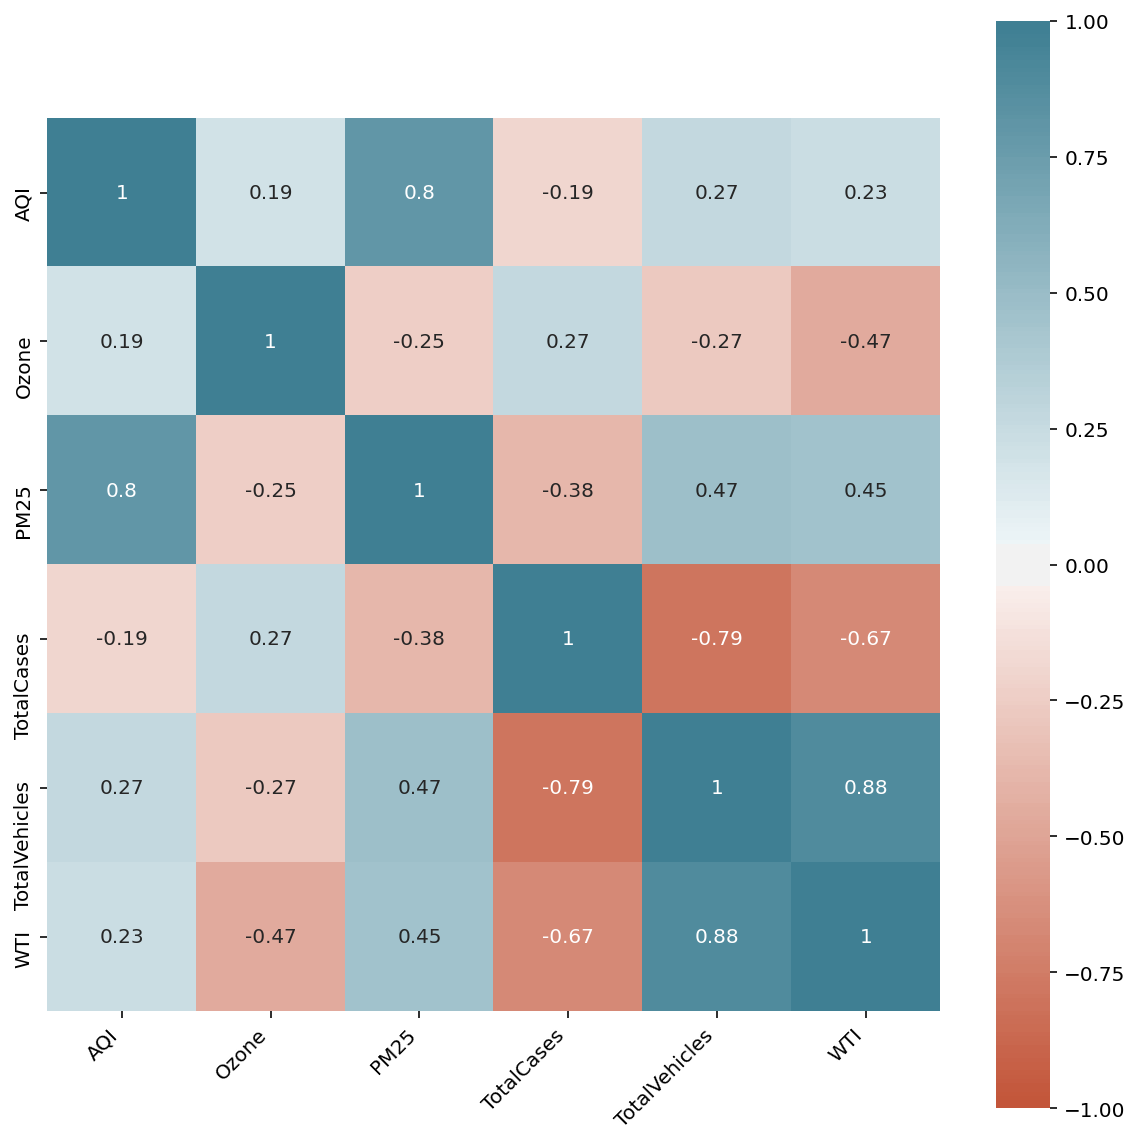

In [144]:
# correlation matrix plot
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
)
_ = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)